# 의사결정나무

### 1. irst 분석

In [1]:
library(rpart)

#### -1 데이터 읽기

In [2]:
c <- rpart(Species ~., data=iris) # rpart() - 의사결정나무 분석 수행

In [3]:
c

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

#### -2 모델링

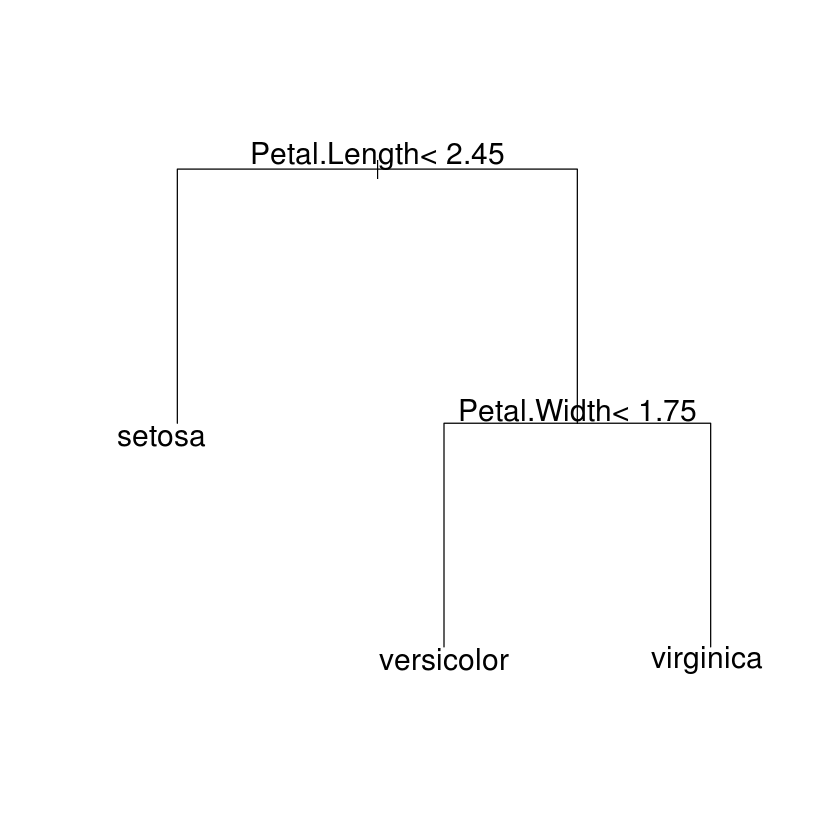

In [7]:
#적합된 트리모형의 시각화는 plot()함수 이용.
plot(c, compress=T, margin=0.1)
text(c, cex=1.5)

#### -3. 예측

In [9]:
head(predict(c, newdata=iris, type="class"))

tail(predict(c, newdata=iris, type="class"))

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

145       146       147       148       149       150 
virginica virginica virginica virginica virginica virginica 
Levels: setosa versicolor virginica

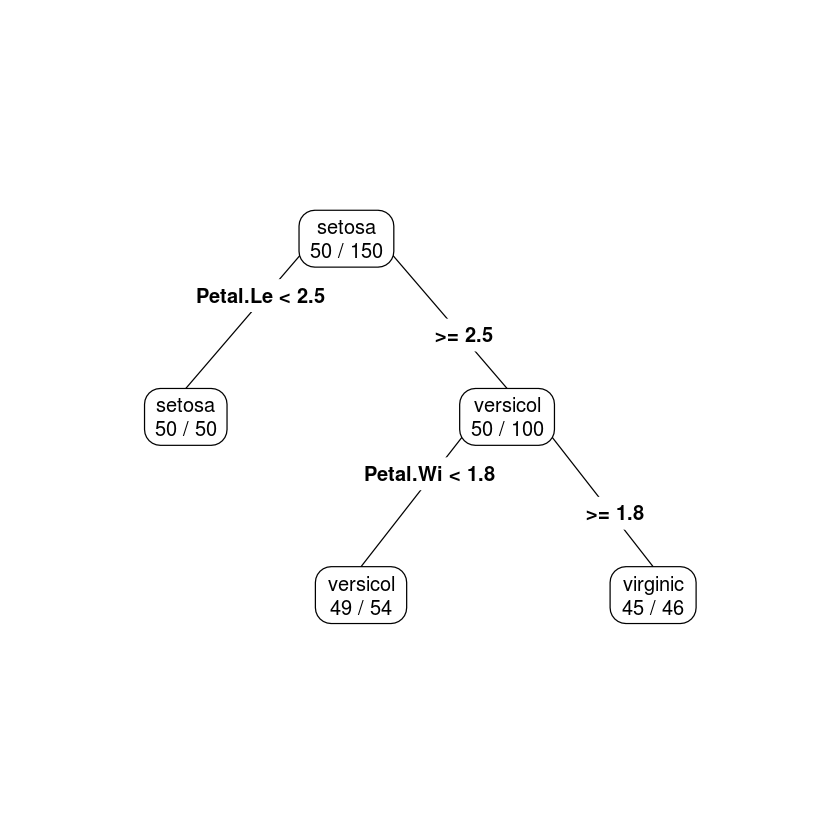

In [24]:
# 다양한 시각화
library(rpart.plot)
prp(c, type=4, extra=2) #extar = 4 -> 확률

# 해석 - 두 조건(Petal.Length >= 2.4 와 Petal.Width<1.8)을 만족한
#       노드에서 49/54는 이 노드에 속하는 해당 개체 54개이며 이 가운데 versicolor가 49임을 나타낸다.

In [20]:
# $cptable 크기에 따른 비용 - 복잡도 모수, 교차타당성오차 제공
c$cptable 

#복잡도 모수, 교차타당성오차 - prune()또는 rpart.control()함수에서 가지치기(pruning)와 트리의 최대 크기를 조절하기 위한 옵션으로 사용된다. 

,CP,nsplit,rel error,xerror,xstd
1,0.50,0,1.00,1.21,0.04836666
2,0.44,1,0.50,0.69,0.06104097
3,0.01,2,0.06,0.09,0.02908608


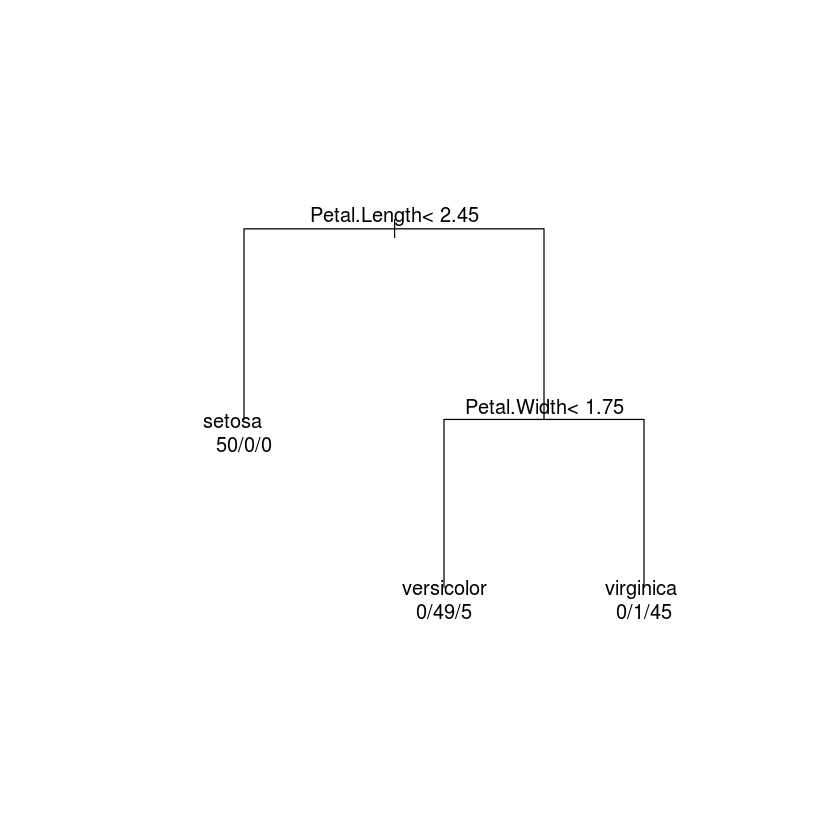

In [33]:
# 교차 타당성 오차를 최소로 하는 트리

opt <- which.min(c$cptable[,"xerror"]) # cptable의 xerror의 최소값을 opt에 넣어라. -> 3번째 행 추출

cp <- c$cptable[opt,"CP"]  # CP열에 3번째 행 값을 불러와라. -> 0.01  

prune.c <- prune(c, cp=cp) # prune함수를 이용해서 최소화된 cp값을 가지고 가지치기를 한다. 
plot(prune.c, margin=0.3)  # 최소화된 cp를 가지고 가지치기를 한 데이터를 플롯으로 그려본다. 
text(prune.c, use.n=T)


# prune함수 설명 관련 참조 사이트 : http://kmrho1103.tistory.com/entry/%EC%A0%9C3%EC%9E%A5-%EB%82%98%EB%AC%B4%EB%AA%A8%ED%98%95-%ED%9A%8C%EA%B7%80%EB%82%98%EB%AC%B4%EB%AA%A8%ED%98%95

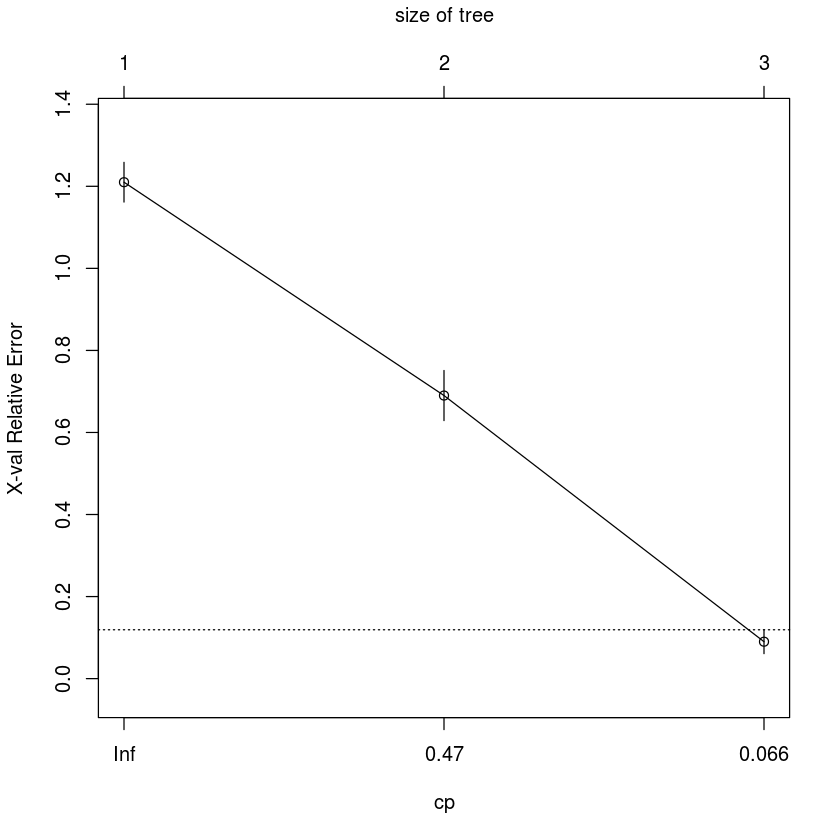

In [26]:
plotcp(c)

### 2. stagec 자료 분석
- 분석에 사용된 자료는 146명의 전립선 암 환자의 자료이다. 7개의 예측변수를 이용하여 범주형의 반응변수(ploidy)를 예측한다.

In [36]:
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


#### -1 자료 읽기 및 구조파악

In [37]:
data(stagec)

In [49]:
str(stagec)
unique(stagec$ploidy)

'data.frame':	146 obs. of  8 variables:
 $ pgtime : num  6.1 9.4 5.2 3.2 1.9 4.8 5.8 7.3 3.7 15.9 ...
 $ pgstat : int  0 0 1 1 1 0 0 0 1 0 ...
 $ age    : int  64 62 59 62 64 69 75 71 73 64 ...
 $ eet    : int  2 1 2 2 2 1 2 2 2 2 ...
 $ g2     : num  10.26 NA 9.99 3.57 22.56 ...
 $ grade  : int  2 3 3 2 4 3 2 3 3 3 ...
 $ gleason: int  4 8 7 4 8 7 NA 7 6 7 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 3 1 1 2 1 2 3 1 2 ...


[1] diploid    aneuploid  tetraploid
Levels: diploid tetraploid aneuploid

#### -2. 전처리

In [50]:
# 결측값 제거
stagec1 <- subset(stagec, !is.na(g2))        # g2열에 na값이 있는 행 제외
stagec2 <- subset(stagec1, !is.na(gleason))  # gleason열에 na값이 있는 행 제외
stagec3 <- subset(stagec2, !is.na(eet))      # eet열에 na값이 있는 행 제외
str(stagec3)

'data.frame':	134 obs. of  8 variables:
 $ pgtime : num  6.1 5.2 3.2 1.9 4.8 3.7 15.9 6.3 2.9 1.5 ...
 $ pgstat : int  0 1 1 1 0 1 0 0 1 1 ...
 $ age    : int  64 59 62 64 69 73 64 65 58 70 ...
 $ eet    : int  2 2 2 2 1 2 2 2 2 2 ...
 $ g2     : num  10.26 9.99 3.57 22.56 6.14 ...
 $ grade  : int  2 3 2 4 3 3 3 3 4 3 ...
 $ gleason: int  4 7 4 8 7 6 7 7 8 8 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 1 1 2 1 1 2 2 2 1 ...


#### -3. train, test set 구분
 - 본 데이터를 train set과 test set으로 양분한다. 
 - 양분을 할때, 나눠진 데이터들의 성격이 최대한 비슷하게 한다. 
 - 방법
     * -1 번호표를 나누고자 하는 데이터의 열만큼 만든다. (번호표는 1번 아니면 2번이다.) 
     * -2 번호표를 행마다 부여해준다. 
     * -3 번호표 기준으로 양분한다.

In [43]:
# Step.1 번호표 만들기
set.seed(1234) # train set과 test set을 비슷하게 나눠주기 위해서 set.seed()를 설정한다. 
ind <- sample(2, nrow(stagec3), replace=TRUE, prob=c(0.7, 0.3))
# 모형 구축을 위해 훈련용 자료와 모형의 성능을 검증하기 위한 검증용 자료를 70%, 30%로 구분한다.

In [55]:
# Step.2 번호표 기준으로 데이터 셋 양분하기
trainData <- stagec3[ind==1,]   # n=102개
testData <- stagec3[ind==2,]   # n=32개

#### -4. 모델링


	 Conditional inference tree with 3 terminal nodes

Response:  ploidy 
Inputs:  pgtime, pgstat, age, eet, g2, grade, gleason 
Number of observations:  102 

1) g2 <= 13.01; criterion = 1, statistic = 49.684
  2) pgstat <= 0; criterion = 0.958, statistic = 7.5
    3)*  weights = 36 
  2) pgstat > 0
    4)*  weights = 15 
1) g2 > 13.01
  5)*  weights = 51 

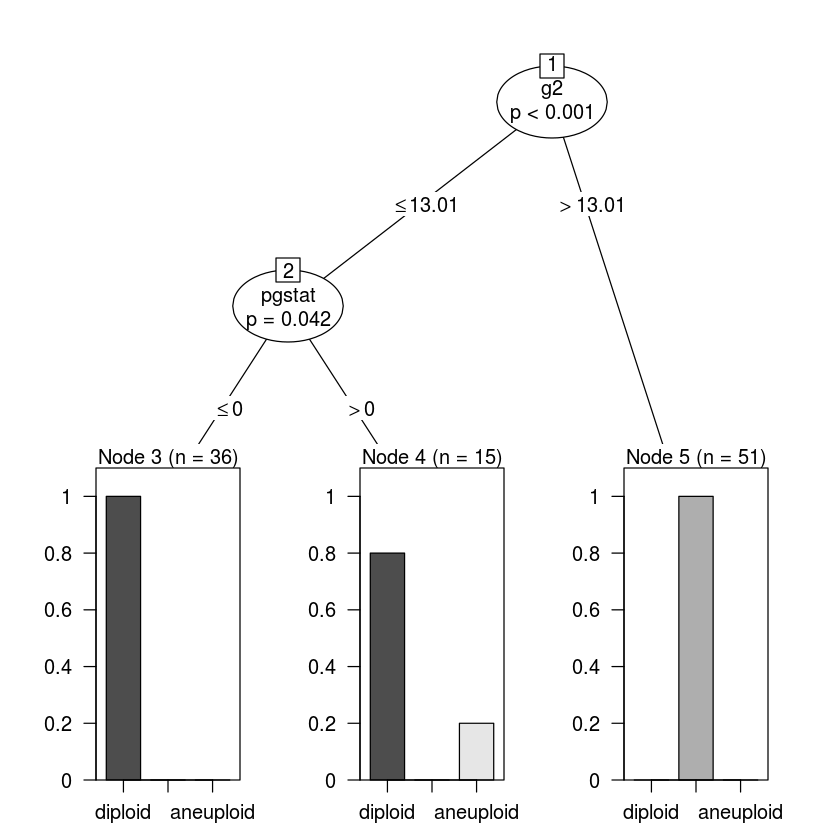

In [47]:
tree <- ctree(ploidy ~., data=trainData)
tree
plot(tree)

#### -5. 검증

In [48]:
testPred = predict(tree, newdata=testData) # testData에 있는 32개의 값들을 모델 tree 를 이용하여 예측한다. 
table(testPred, testData$ploidy)           # 예측값과 실제값을 테이블로 그려본다.

#2개 오류 발생

            
testPred     diploid tetraploid aneuploid
  diploid         17          0         1
  tetraploid       0         13         1
  aneuploid        0          0         0